In [3]:
! pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("sales_updated.csv")


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Standardize Region: title case, strip whitespace
df['Region'] = df['Region'].str.strip().str.title()

df['Product'] = df['Product'].replace({
    'D1Shirt': 'D1-Shirt',
    'g2-Blazers': 'G2-Blazers'
})

blazer_regions = df[df['Product'] == 'G2-Blazers']['Region'].dropna().unique()
print("Regions where Blazers are sold:", blazer_regions)

# If multiple regions found, that's an anomaly
blazer_region = blazer_regions[0] if len(blazer_regions) == 1 else None
if blazer_region:
    anomalies = df[(df['Product'] == 'G2-Blazers') & (df['Region'] != blazer_region)]
    print("\nAnomalies based on Blazer sales rule:\n", anomalies)
df.loc[(df['Region'].isnull()) & (df['Product'] == 'G2-Blazers'), 'Region'] = blazer_region

# missing Amount with average per Product
df['Amount'] = df.groupby('Product')['Amount'].transform(
    lambda x: x.fillna(x.mean())
)

df['Month'] = df['Date'].dt.to_period('M')


Regions where Blazers are sold: ['East']

Anomalies based on Blazer sales rule:
 Empty DataFrame
Columns: [Date, Region, Product, Amount, Customer ID, Month]
Index: []


In [12]:
# P1: Find month with highest sales
monthly_sales = df.groupby('Month')['Amount'].sum().sort_values(ascending=False)
print("\nMonth with Highest Sales:\n", monthly_sales.head(1))


Month with Highest Sales:
 Month
2024-03    1500.0
Freq: M, Name: Amount, dtype: float64


/tmp/ipykernel_8507/2554849712.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.values, y=region_sales.index, palette="Blues_d")


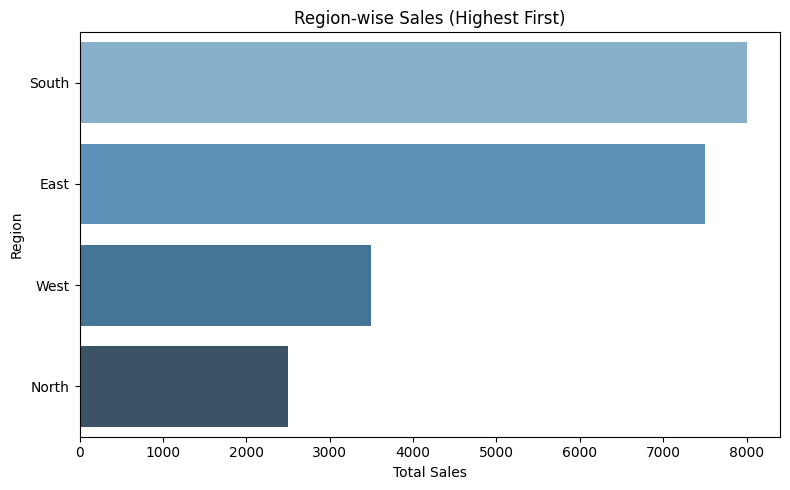

In [ ]:
 #P2: Plot region-wise sales
region_sales = df.groupby('Region')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=region_sales.values, y=region_sales.index, palette="Blues_d")
plt.title("Region-wise Sales (Highest First)")
plt.xlabel("Total Sales")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

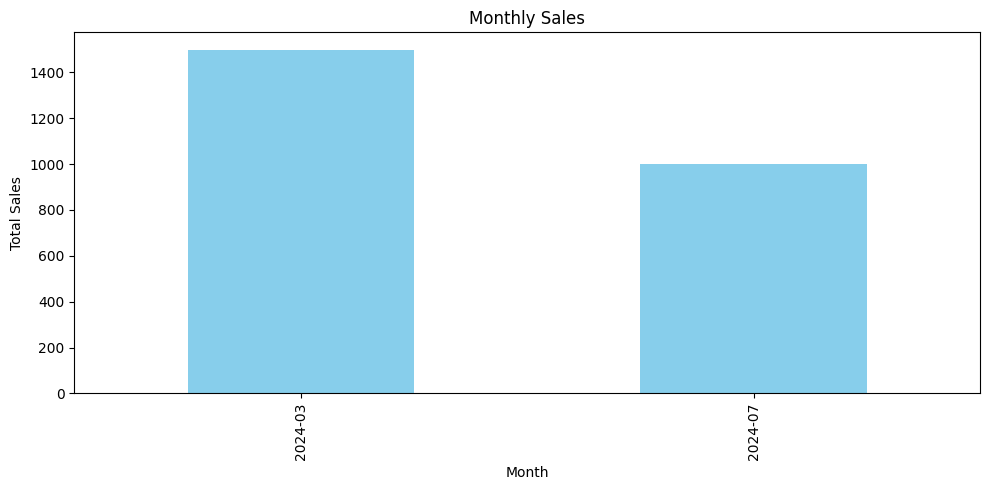

In [11]:
# P3: Plot month-wise sales
# -------------------------------
monthly_sales_plot = monthly_sales.sort_index()
plt.figure(figsize=(10, 5))
monthly_sales_plot.plot(kind='bar', color='skyblue')
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()